<a href="https://colab.research.google.com/github/Alejosotog/PruebaAnaliticaLDC__JohnA.SotoGomez/blob/main/PT2/PruebaTecnica_Bancolombia20250316.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba analítica: Segmentación LAFT

# Prueba analítica LDC Ciencia de datos cumplimiento


---
John Alejandro Soto Gómez
--
- Candidato el cargo cientifico de Datos

- Empresa: Bancolombia

- Duración de prueba: 2025-03-14 a 2025-03-17

- Fecha límite de entrega: 2025-03-17 (Hora máx. 11:59am)


---


Base de datos:

Ubicación local: insumo_prueba.xlsx

Caracterización del dataset: 1 archivo insumo_prueba.xlsx

Size: 28.8KB

Dimensión del dataframe: 433 filas x 6 columnas.

---
Objetivo:
--
Evaluar la capacidad para abordar un problema de clasificación de texto con poca información, incluyendo el flujo completo de carga, procesamiento, transformación, entrenamiento, y despliegue de un modelo, siguiendo buenas prácticas de MLOps


# Identificación de los datos y Análisis Exploratorio de Datos

- Cargamos librerías necesarias

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Carga del dataset

In [8]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive (ajustar según la ubicación real)
file_path = "/content/drive/My Drive/PruebaTecnica_Bancolombia20230316/insumo_prueba.xlsx"

# Cargar el archivo en un DataFrame
df = pd.read_excel(file_path)

# Ver las primeras filas del DataFrame
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Controles,Riesgo 1,Riesgo 2,Riesgo 3,Riesgo 4,Riesgo 5
0,Verificar/Corregir observaciones/comentarios d...,Si,No,No,No,No
1,Verificar todos los soportes legales,No,Si,Si,No,No
2,Verificar todos los documentos legales,No,Si,Si,No,No
3,Verificar si el acuerdo generado cumple las co...,No,No,Si,No,No
4,Verificar si el acuerdo firmado cumple condici...,No,No,Si,No,No


Revisión de la primeras filas

In [9]:
print(df.head())

                                           Controles Riesgo 1 Riesgo 2  \
0  Verificar/Corregir observaciones/comentarios d...       Si       No   
1              Verificar todos los soportes legales        No       Si   
2            Verificar todos los documentos legales        No       Si   
3  Verificar si el acuerdo generado cumple las co...       No       No   
4  Verificar si el acuerdo firmado cumple condici...       No       No   

  Riesgo 3 Riesgo 4 Riesgo 5  
0       No       No       No  
1       Si       No       No  
2       Si       No       No  
3       Si       No       No  
4       Si       No       No  


Verificación de la información del dataset

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Controles  433 non-null    object
 1   Riesgo 1   433 non-null    object
 2   Riesgo 2   433 non-null    object
 3   Riesgo 3   433 non-null    object
 4   Riesgo 4   433 non-null    object
 5   Riesgo 5   433 non-null    object
dtypes: object(6)
memory usage: 20.4+ KB
None


Renombramiento de columnas

In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.head())

                                           controles riesgo_1 riesgo_2  \
0  Verificar/Corregir observaciones/comentarios d...       Si       No   
1              Verificar todos los soportes legales        No       Si   
2            Verificar todos los documentos legales        No       Si   
3  Verificar si el acuerdo generado cumple las co...       No       No   
4  Verificar si el acuerdo firmado cumple condici...       No       No   

  riesgo_3 riesgo_4 riesgo_5  
0       No       No       No  
1       Si       No       No  
2       Si       No       No  
3       Si       No       No  
4       Si       No       No  


Con lo anterior, elimina espacios y normalizamos los nombres de las columnas

- Verificamos si tenemos valores nulos

In [13]:
print(df.isnull().sum())


controles    0
riesgo_1     0
riesgo_2     0
riesgo_3     0
riesgo_4     0
riesgo_5     0
dtype: int64


Es de notar que incluso al tener variables categoricas no se presentan valores nulos

- Convertimos valores de texto a formato consistente ( texto a minúsculas y eliminamos espacios adicionales)

In [15]:
df = df.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)
print(df)

                                             controles riesgo_1 riesgo_2  \
0    verificar/corregir observaciones/comentarios d...       si       no   
1                 verificar todos los soportes legales       no       si   
2               verificar todos los documentos legales       no       si   
3    verificar si el acuerdo generado cumple las co...       no       no   
4    verificar si el acuerdo firmado cumple condici...       no       no   
..                                                 ...      ...      ...   
428                               establecer políticas       no       no   
429  definir cláusula de declaración de conflictos ...       no       no   
430  definir comités especializados que supervisen ...       si       no   
431  definir y documentar protocolos claros para la...       no       no   
432                              monitoreo de bloqueos       no       no   

    riesgo_3 riesgo_4 riesgo_5  
0         no       no       no  
1         si       no

- A continuación, identificamos y eliminamos duplicados

In [16]:
df.drop_duplicates(inplace=True)
print(df)

                                             controles riesgo_1 riesgo_2  \
0    verificar/corregir observaciones/comentarios d...       si       no   
1                 verificar todos los soportes legales       no       si   
2               verificar todos los documentos legales       no       si   
3    verificar si el acuerdo generado cumple las co...       no       no   
4    verificar si el acuerdo firmado cumple condici...       no       no   
..                                                 ...      ...      ...   
428                               establecer políticas       no       no   
429  definir cláusula de declaración de conflictos ...       no       no   
430  definir comités especializados que supervisen ...       si       no   
431  definir y documentar protocolos claros para la...       no       no   
432                              monitoreo de bloqueos       no       no   

    riesgo_3 riesgo_4 riesgo_5  
0         no       no       no  
1         si       no

- Revisamos la cantidad de riesgos en Si y en No para cada uno y su respectivo tipo de datos.

In [19]:
conteos = pd.concat([
    df["riesgo_1"].value_counts(),
    df["riesgo_2"].value_counts(),
    df["riesgo_3"].value_counts(),
    df["riesgo_4"].value_counts(),
    df["riesgo_5"].value_counts()
], axis=1)

conteos.columns = ["Riesgo 1", "Riesgo 2", "Riesgo 3", "Riesgo 4", "Riesgo 5"]

# Mostramos los dtypes de cada columna
dtypes = df[["riesgo_1", "riesgo_2", "riesgo_3", "riesgo_4", "riesgo_5"]].dtypes

print(conteos)
print("\nTipos de datos:")
print(dtypes)


    Riesgo 1  Riesgo 2  Riesgo 3  Riesgo 4  Riesgo 5
no       331       354       292       381       400
si       102        79       141        52        33

Tipos de datos:
riesgo_1    object
riesgo_2    object
riesgo_3    object
riesgo_4    object
riesgo_5    object
dtype: object


Del resultado anterior, vemos que hay controles que tienen en su mayoria el Riesgo 1 con 141, seguido del Riesgo 1 con 102.

- Normalizamos los valores categóricos (Es claro que todos son valores categoricos, sin embargo normalizamos) para evitar confusiones en el Dataframe definitivo.

In [20]:
df.replace({"si": "Sí", "no": "No"}, inplace=True)
print(df)

                                             controles riesgo_1 riesgo_2  \
0    verificar/corregir observaciones/comentarios d...       Sí       No   
1                 verificar todos los soportes legales       No       Sí   
2               verificar todos los documentos legales       No       Sí   
3    verificar si el acuerdo generado cumple las co...       No       No   
4    verificar si el acuerdo firmado cumple condici...       No       No   
..                                                 ...      ...      ...   
428                               establecer políticas       No       No   
429  definir cláusula de declaración de conflictos ...       No       No   
430  definir comités especializados que supervisen ...       Sí       No   
431  definir y documentar protocolos claros para la...       No       No   
432                              monitoreo de bloqueos       No       No   

    riesgo_3 riesgo_4 riesgo_5  
0         No       No       No  
1         Sí       No

- Para mayor seguridad, convertimos columnas categóricas a tipo 'category'

In [22]:
categorical_columns = ["riesgo_1", "riesgo_2", "riesgo_3", "riesgo_4", "riesgo_5"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

Creamos una nueva variable para sumar los riesgos asociados a cada control y finalmente sumamos los riesgos totales.

In [23]:
print(df[categorical_columns].dtypes)

for col in categorical_columns:
    df[col] = df[col].astype(str).astype("category").cat.codes

print(df[categorical_columns].head())

df["riesgo_total"] = df[categorical_columns].sum(axis=1)
print(df[["riesgo_total"]].head())

total_riesgo = df["riesgo_total"].sum()
print("Suma total de riesgos:", total_riesgo)


riesgo_1    category
riesgo_2    category
riesgo_3    category
riesgo_4    category
riesgo_5    category
dtype: object
   riesgo_1  riesgo_2  riesgo_3  riesgo_4  riesgo_5
0         1         0         0         0         0
1         0         1         1         0         0
2         0         1         1         0         0
3         0         0         1         0         0
4         0         0         1         0         0
   riesgo_total
0             1
1             2
2             2
3             1
4             1
Suma total de riesgos: 407


In [36]:
df.to_csv(r"/content/drive/My Drive/PruebaTecnica_Bancolombia20230316/insumo_prueba_limpio.csv", index=False, encoding="utf-8-sig")
print(df.head())

                                           controles  riesgo_1  riesgo_2  \
0  verificar/corregir observaciones/comentarios d...         1         0   
1               verificar todos los soportes legales         0         1   
2             verificar todos los documentos legales         0         1   
3  verificar si el acuerdo generado cumple las co...         0         0   
4  verificar si el acuerdo firmado cumple condici...         0         0   

   riesgo_3  riesgo_4  riesgo_5  riesgo_total  
0         0         0         0             1  
1         1         0         0             2  
2         1         0         0             2  
3         1         0         0             1  
4         1         0         0             1  


- Frecuencias por cada riesgo

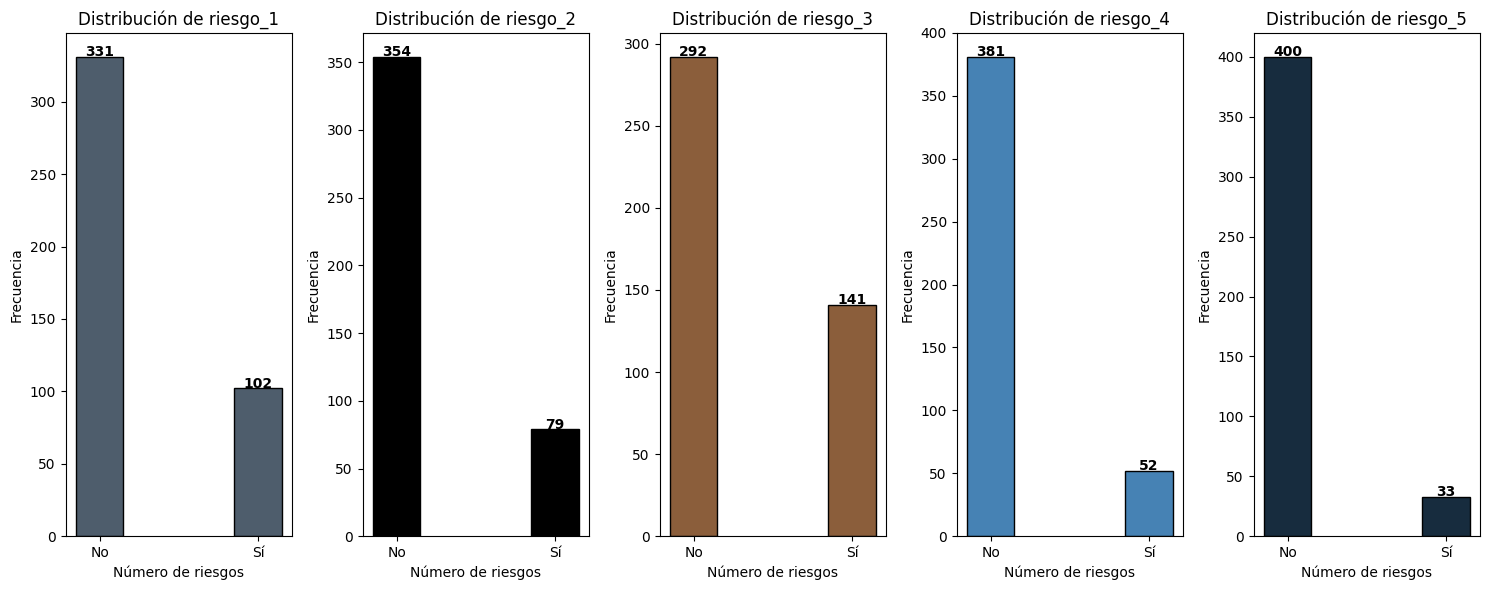

In [25]:
riesgos = ["riesgo_1", "riesgo_2", "riesgo_3", "riesgo_4", "riesgo_5"]
colores = ["#4E5D6C", "black", "#8B5E3B", "#4682b4", "#172c3e"]

plt.figure(figsize=(15, 6))  # Ajustar tamaño de la figura

for i, (col, color) in enumerate(zip(riesgos, colores), 1):
    plt.subplot(1, 5, i)  # Crear subgráficos en una fila con 5 columnas

    # Contamos las frecuencias de "No" (0) y "Sí" (1)
    counts = df[col].value_counts().sort_index()
    labels = ["No", "Sí"]

    # Graficamos las barras alineadas en "mid"
    bars = plt.bar(labels, counts, color=color, edgecolor="black", align="center", width=0.3)

    # Agregamos etiquetas con los valores encima de las barras
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 int(bar.get_height()), ha="center", fontsize=10, fontweight="bold")

    plt.xlabel("Número de riesgos")
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {col}")

plt.tight_layout()  # Ajustar espaciado entre gráficos
plt.show()


Identificamos cual es uno de los controles más criticos del dataset suministrado según la mayor cantidad de riesgos asociados

In [48]:
# Control más crítico (el que cubre más riesgos)
most_critical_control = df.loc[risks_per_control.idxmax(), "controles"]
most_critical_control

'verificar que el contrato sea acorde con las condiciones establecidas'

- Ahora visualizamos en un mismo gráfico de frecuencias todos los riesgos

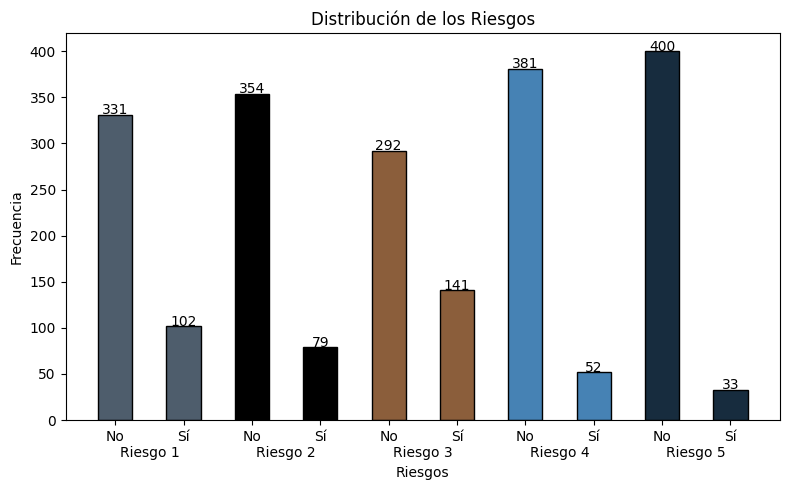

In [51]:
# Crear lista de valores y posiciones en el eje x
values = []
bar_colors = []
x_positions = []
x_labels = []

for i, col in enumerate(riesgos):
    values.extend([
        frecuencias[col].get(0, 0),  # Frecuencia de "No"
        frecuencias[col].get(1, 0)   # Frecuencia de "Sí"
    ])
    bar_colors.extend([colores[i], colores[i]])  # Mismo color para "No" y "Sí"
    x_positions.extend([i * 2, i * 2 + 1])  # Posiciones en X
    x_labels.extend(["No", "Sí"])  # Etiquetas debajo de cada barra

plt.figure(figsize=(8, 5))
bars = plt.bar(x_positions, values, color=bar_colors, edgecolor="black", width=0.5)  # Gráfico de barras

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,  # Etiquetas a cada barra
             str(int(bar.get_height())), ha="center", fontsize=10)

plt.xticks(ticks=x_positions, labels=x_labels)  # "No" y "Sí" bajo cada barra

for i in range(len(riesgos)):
    plt.text(i * 2 + 0.5, -max(values) * 0.10, f"Riesgo {i+1}",
             ha="center", fontsize=10)  # Más abajo para evitar superposición

plt.xlabel("Riesgos", labelpad=16)
plt.ylabel("Frecuencia")
plt.title("Distribución de los Riesgos")

plt.tight_layout()
plt.show()

- Visualizamos que controles hay para cada uno de los riesgos

riesgo_total
1    297
2     33
3      8
4      5
Name: count, dtype: int64


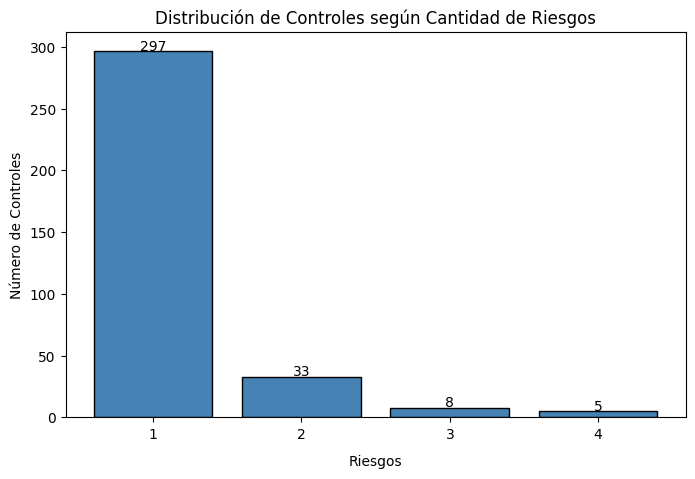

In [56]:
# Definir las columnas de riesgos
riesgos = ["riesgo_1", "riesgo_2", "riesgo_3", "riesgo_4", "riesgo_5"]

# Sumar la cantidad de riesgos que tiene cada control
df["riesgo_total"] = df[riesgos].sum(axis=1)

# Contar cuántos controles tienen 1, 2, 3, 4 o 5 riesgos
conteo_riesgos = df["riesgo_total"].value_counts().sort_index()

# Eliminar el índice 0 si existe
conteo_riesgos = conteo_riesgos[conteo_riesgos.index > 0]

# Mostrar los valores en consola
print(conteo_riesgos)

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(conteo_riesgos.index, conteo_riesgos.values, color="steelblue", edgecolor="black")

# Personalizar el gráfico
plt.xlabel("Riesgos", labelpad=10)
plt.ylabel("Número de Controles")
plt.title("Distribución de Controles según Cantidad de Riesgos")
plt.xticks(conteo_riesgos.index)  # Asegurar que se vean bien las categorías

# Mostrar los valores encima de cada barra
for i, v in enumerate(conteo_riesgos.values):
    plt.text(conteo_riesgos.index[i], v + 0.5, str(v), ha="center", fontsize=10)

plt.show()


De la gráfica anterior se puede notar que de los 433 controles, 90 tiene solo un riesgo, 297 tienen 2 riesgos, 33 controles tienen 3 riesgos, 8 controles tienen 4 de los 5 riesgos establecidos y tan solo 5 controles de los 433 disponibles tienen los 5 riesgos.

Ahora miremoslo mediante un grafico de torta

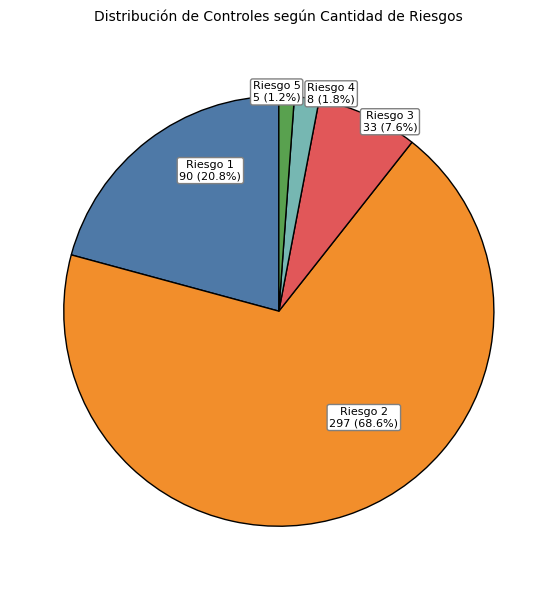

In [59]:
# Ajustar los índices para que vayan de "Riesgo 1" a "Riesgo 5"
labels = [f"Riesgo {int(i+1)}" for i in conteo_riesgos.index]

# Colores sobrios
colores = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]

# Crear la figura más pequeña
plt.figure(figsize=(6, 6))

# Graficar Pie Chart sin etiquetas dentro
wedges, texts, autotexts = plt.pie(
    conteo_riesgos,
    labels=[""] * len(labels),  # Quita etiquetas por defecto
    autopct="",  # No mostrar % por defecto
    colors=colores,
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)

# Agregar etiquetas con anotaciones más pequeñas
for i, (wedge, label, value) in enumerate(zip(wedges, labels, conteo_riesgos)):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Obtener ángulo medio del segmento
    x = np.cos(np.radians(angle)) * 1.1  # Ajustar posición X
    y = np.sin(np.radians(angle)) * 1.1  # Ajustar posición Y

    if label == "Riesgo 1":
        y -= 0.22
        x += 0.35

    if label == "Riesgo 2":
        y += 0.55
        x += 0.05

    if label == "Riesgo 3":
        y -= 0.12
        x += 0.06

    if label == "Riesgo 4":
        y -= 0.08
        x += 0.1

    if label == "Riesgo 5":
        y -= 0.08
        x -= 0.05

    plt.annotate(
        f"{label}\n{value} ({conteo_riesgos[i] / conteo_riesgos.sum() * 100:.1f}%)",
        (x, y),
        ha="center",
        va="center",
        fontsize=8,  # Tamaño de etiqueta reducido
        bbox=dict(boxstyle="round,pad=0.2", edgecolor="gray", facecolor="white")
    )

# Título
plt.title("Distribución de Controles según Cantidad de Riesgos", pad=15, fontsize=10)

# Ajustar espacios para evitar solapamientos
plt.tight_layout()

# Mostrar gráfico
plt.show()

A continuación, filtraré los controles con más riesgos.

                                             controles  riesgo_total
75   validar que las condiciones negociadas estén c...             4
70   validar que los documentos cumplan con los req...             4
76   validar que las condiciones negociadas estén c...             4
79   validar que la información se encuentre correc...             4
15   verificar que el contrato sea acorde con las c...             4
17             verificar publicación de la información             3
180   revisar las condiciones para ofrecer el servicio             3
67   validar que se cumplan con las condiciones pac...             3
181   revisar las condiciones para ofrecer el producto             3
182      revisar las condiciones para ofrecer el canal             3


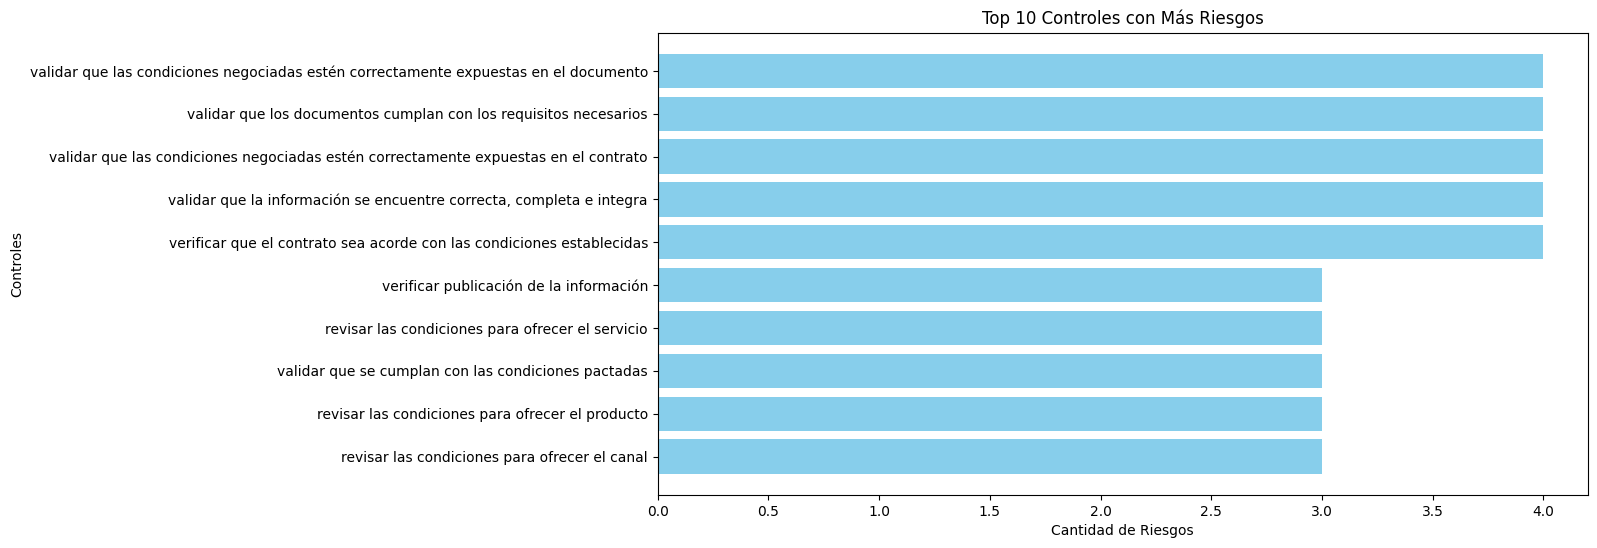

In [ ]:
top_controles = df.sort_values(by="riesgo_total", ascending=False).head(10)  # Ordenar los controles por la cantidad total de riesgos.
print(top_controles[["controles", "riesgo_total"]])

# Gráfico de los controles con más riesgos
plt.figure(figsize=(12, 6))
plt.barh(top_controles["controles"], top_controles["riesgo_total"], color="skyblue")
plt.xlabel("Cantidad de Riesgos")
plt.ylabel("Controles")
plt.title("Top 10 Controles con Más Riesgos")
plt.gca().invert_yaxis()  # Invertir eje para mejor visualización
plt.show()

- Revisemos si tenemos en todo el dataframe controles repetidos.

In [60]:
# Verificar si hay controles repetidos en la columna "controles"
controles_duplicados = df['controles'].duplicated().sum()

# Mostrar la cantidad de controles repetidos
print(f'Cantidad de controles repetidos: {controles_duplicados}')


Cantidad de controles repetidos: 0


# Aplicamos técnicas de Machine Learining para clasificación y entreanmiento del modelo

In [62]:
df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: 1 if x == 'Si' else 0)

# Crear una nueva columna con el total de riesgos asociados
df['total_riesgos'] = df.iloc[:, 1:].sum(axis=1)

# Vectorizar los textos de los controles
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df['controles'])

# Unir las características de texto con los riesgos
X = np.hstack((X_text.toarray(), df.iloc[:, 1:-1].values))
y = df['total_riesgos']  # Etiqueta de clasificación


<ipython-input-62-8bf5f8abaa5f>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: 1 if x == 'Si' else 0)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


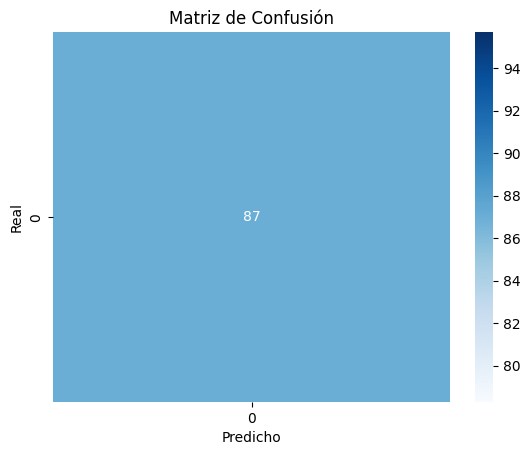

In [63]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluación del modelo
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Lo que puedo inferir en primera instancia sobre el gráfico anterior es que hay una precisión alta en todos los Riesgos (1,2,3,4,5) . Dado que cada uno de los riesgos se toman como las clses, vemos que el dataset está balanceado.

- Pipeline completo para el Modelo de Machine Learining

In [70]:
import joblib
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from flask import Flask, request, jsonify
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, multilabel_confusion_matrix


# Verificar nombres de columnas
#print(df.columns)
print(df.head())

# 2. Preprocesamiento y Transformación de Datos (Data Preprocessing & Transformation)
def preprocess_data(df):
    df.fillna("No", inplace=True)
    df.replace({'Si': 1, 'No': 0}, inplace=True)

    # Separar características y etiquetas
    X_text = df['controles']
    y = df.iloc[:, 1:]  # Columnas de riesgos

    # Vectorización del texto
    vectorizer = TfidfVectorizer()
    X_transformed = vectorizer.fit_transform(X_text)

    return X_transformed, y, vectorizer

X, y, vectorizer = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 3. Entrenamiento del Modelo (Model Training)
def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

model = train_model(X_train, y_train)
joblib.dump(model, '/content/drive/My Drive/PruebaTecnica_Bancolombia20230316/model.pkl')
joblib.dump(vectorizer, '/content/drive/My Drive/PruebaTecnica_Bancolombia20230316/vectorizer.pkl')


# 4. Validación del Modelo (Model Validation)
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)

evaluate_model(model, X_test, y_test)

# 5. Despliegue del Modelo (Model Deployment)
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['control']
    vectorizer = joblib.load('models/vectorizer.pkl')
    model = joblib.load('models/model.pkl')

    X_input = vectorizer.transform([data])
    prediction = model.predict(X_input)

    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


                                           controles  riesgo_1  riesgo_2  \
0  verificar/corregir observaciones/comentarios d...         0         0   
1               verificar todos los soportes legales         0         0   
2             verificar todos los documentos legales         0         0   
3  verificar si el acuerdo generado cumple las co...         0         0   
4  verificar si el acuerdo firmado cumple condici...         0         0   

   riesgo_3  riesgo_4  riesgo_5  riesgo_total  total_riesgos  
0         0         0         0             0              0  
1         0         0         0             0              0  
2         0         0         0             0              0  
3         0         0         0             0              0  
4         0         0         0             0              0  
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

Lo que puedo inferir sobre las métricas (precision, recall y f1-score) son muy bajas para algunas clases, lo que indica que el modelo no está aprendiendo correctamente a clasificar los riesgos

- Ahora entreremos, validaremos y desplegareamos el modelo utilizando Random Forest con KFold y Gradio para la inferencia

El flujo será:

Preprocesamiento: Convertir "Si"/"No" en 1/0.

División de datos: Separar en entrenamiento y prueba.

Entrenamiento y validación: Entrenamos un modelo de Random Forest con KFold y evaluamos su rendimiento.

Despliegue: Creamos una interfaz con Gradio para probar el modelo.

Importación de librerías

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, classification_report
import re
import gradio as gr

Carga de datos

In [93]:
# Definir la ruta del archivo
RutaDataSet = r"/content/drive/My Drive/PruebaTecnica_Bancolombia20230316/insumo_prueba.xlsx"
try:
    # Cargar y limpiar nombres de columnas en un solo paso
    df = pd.read_excel(RutaDataSet)
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
except Exception as e:
    print(f"Error al cargar los datos: {e}")

print(df.head())

                                           controles riesgo_1 riesgo_2  \
0  Verificar/Corregir observaciones/comentarios d...       Si       No   
1              Verificar todos los soportes legales        No       Si   
2            Verificar todos los documentos legales        No       Si   
3  Verificar si el acuerdo generado cumple las co...       No       No   
4  Verificar si el acuerdo firmado cumple condici...       No       No   

  riesgo_3 riesgo_4 riesgo_5  
0       No       No       No  
1       Si       No       No  
2       Si       No       No  
3       Si       No       No  
4       Si       No       No  


2. Preprocesamiento y Transformación de Datos

In [94]:
# Convertir los valores "Si" y "No" a 1 y 0
df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: 1 if x.strip().lower() == "si" else 0)

# Convertir a formato multietiqueta
mlb = MultiLabelBinarizer()
X = df["controles"]
y = mlb.fit_transform(df.iloc[:, 1:].values.tolist())

<ipython-input-94-5e9843f7729f>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: 1 if x.strip().lower() == "si" else 0)


In [95]:
print(df.columns)  # Para ver los nombres reales de las columnas

# Función para entrenar el modelo
def entrenar_modelo():
    global pipeline
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

    # Validación cruzada
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    print(f'Cross-validation accuracy: {np.mean(scores):.4f}')

    # Entrenar modelo final
    pipeline.fit(X, y)

# Función de predicción para Gradio
def predict(control_text):
    control_row = df[df["controles"] == control_text]
    if not control_row.empty:
        associated_risks = control_row.iloc[0, 1:].values.tolist()
        risks = [col.replace("_", " ").title() for col, val in zip(df.columns[1:], associated_risks) if val == 1]
        return f"Riesgos asociados: {', '.join(risks) if risks else 'Ninguno'}"
    return "Control no encontrado"

# Definir estilos CSS personalizados
custom_css = """
.gradio-container {
    background-color: #808080;
    color: white;
    font-family: Arial, sans-serif;
}

.gr-button {
    background-color: #FFD700;
    color: black !important;
}

.gr-dropdown {
    background-color: black;
    color: black !important;
}

.gr-textbox {
    background-color: #879080;
    color: black !important;
}
"""


# Crear la interfaz de usuario con Gradio
iface = gr.Interface(
    fn=predict,
    inputs=gr.Dropdown(choices=df["controles"].tolist(), label="Seleccione un control:"),
    outputs=gr.Textbox(label="Salida:"),
    title="Clasificación de Controles en Categorías de Riesgo",
    description="Seleccione un control y se mostrarán los riesgos asociados.",
    css=custom_css  # Aplicar los estilos
)

# Entrenar y ejecutar la aplicación
entrenar_modelo()
iface.launch(share=True)  # `share=True` permite compartir el link públicamente"

Index(['controles', 'riesgo_1', 'riesgo_2', 'riesgo_3', 'riesgo_4',
       'riesgo_5'],
      dtype='object')
Cross-validation accuracy: 0.7875
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a09cea7878c4ac9fb5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
